In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
 ! pip install -q kaggle

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
 ! kaggle datasets list

401 - Unauthorized - Unauthenticated


In [ ]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

In [10]:
! mkdir train

In [11]:
! unzip diabetes-prediction-dataset.zip -d train

Archive:  diabetes-prediction-dataset.zip
  inflating: train/diabetes_prediction_dataset.csv  


In [12]:
data=pd.read_csv('/content/train/diabetes_prediction_dataset.csv')

In [13]:
data.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [14]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [15]:
data.shape

(100000, 9)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [17]:
new_data=data.select_dtypes(np.number)

In [18]:
new_data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0


In [19]:
X=new_data.drop('diabetes', axis=1)

In [21]:
Y=new_data['diabetes']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
X_train

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
75220,73.0,0,0,24.77,3.5,80
48955,80.0,0,0,24.60,5.7,145
44966,38.0,0,0,24.33,4.0,158
13568,26.0,0,0,18.87,5.0,100
92727,61.0,1,0,22.11,4.5,85
...,...,...,...,...,...,...
6265,49.0,0,0,32.98,5.7,80
54886,15.0,0,0,28.10,5.0,159
76820,42.0,0,0,26.14,5.8,85
860,37.0,0,0,24.96,6.2,158


In [25]:
X_train.shape

(80000, 6)

In [26]:
X_test.shape

(20000, 6)

In [57]:
from sklearn import tree

In [58]:
from matplotlib import pyplot as plt

[Text(0.7083333333333334, 0.9166666666666666, 'x[4] <= 6.7\ngini = 0.155\nsamples = 80000\nvalue = [73208, 6792]'),
 Text(0.625, 0.75, 'x[5] <= 210.0\ngini = 0.091\nsamples = 76893\nvalue = [73208, 3685]'),
 Text(0.5416666666666666, 0.5833333333333334, 'x[0] <= 54.5\ngini = 0.058\nsamples = 75464\nvalue = [73208, 2256]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[1] <= 0.5\ngini = 0.025\nsamples = 52766\nvalue = [52092, 674]'),
 Text(0.16666666666666666, 0.25, 'x[3] <= 39.205\ngini = 0.021\nsamples = 51166\nvalue = [50624, 542]'),
 Text(0.08333333333333333, 0.08333333333333333, 'gini = 0.017\nsamples = 48962\nvalue = [48547, 415]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.109\nsamples = 2204\nvalue = [2077, 127]'),
 Text(0.5, 0.25, 'x[4] <= 5.35\ngini = 0.151\nsamples = 1600\nvalue = [1468, 132]'),
 Text(0.4166666666666667, 0.08333333333333333, 'gini = 0.0\nsamples = 571\nvalue = [571, 0]'),
 Text(0.5833333333333334, 0.08333333333333333, 'gini = 0.224\nsamples = 1029\nvalue =

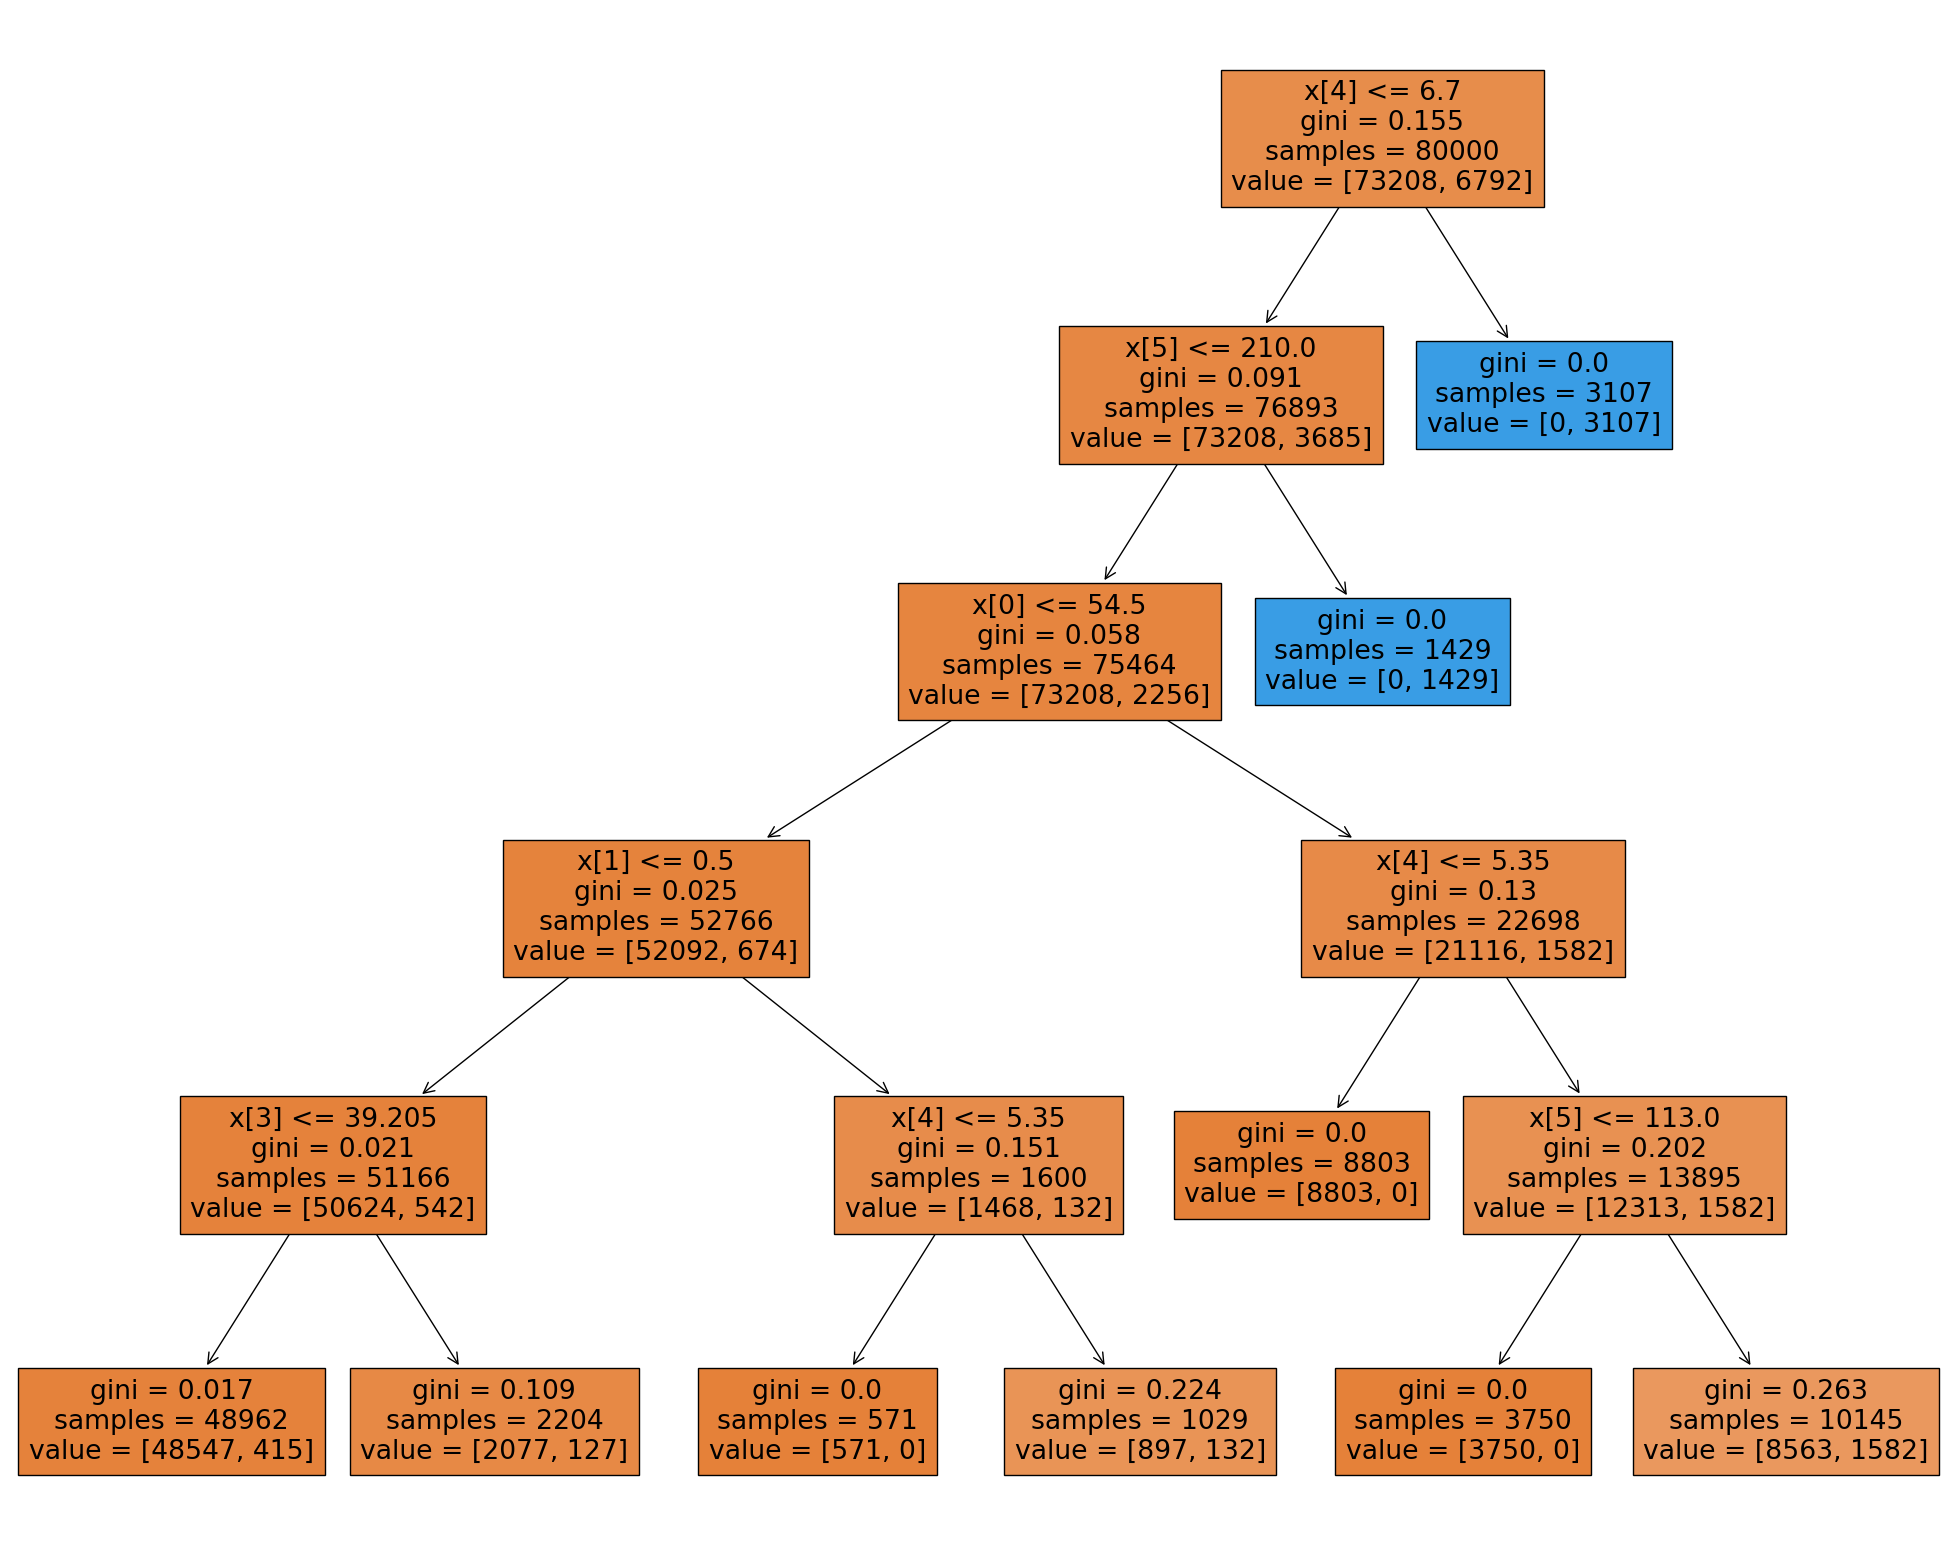

In [59]:
fig=plt.figure(figsize=(25,20))
tree.plot_tree(model,filled=True)

<Axes: >

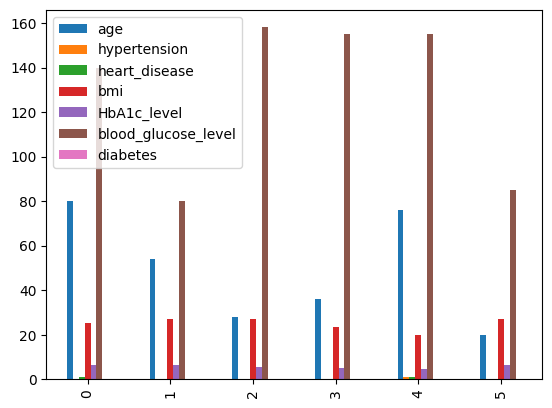

In [63]:
new_data.head(6).plot(kind='bar')

the important feature is blood_glucose_level

In [27]:
from sklearn.tree import DecisionTreeClassifier


In [48]:
model=DecisionTreeClassifier(max_depth=5)

In [49]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [50]:
y_pred=model.predict(X_test)

In [51]:
score=model.score(X_test,Y_test)

model accuracy on test data is

In [52]:
print(score)

0.97215


In [53]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
classification=classification_report(Y_test,y_pred)
cf_matrix=confusion_matrix(Y_test,y_pred)
accuracy=accuracy_score(Y_test,y_pred)

the classification report is :------

In [54]:
print("the classification report is\n\n",classification)

the classification report is

               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



CONFUSION MATRIX

In [55]:
print("the confusion matrix is :\n\n",cf_matrix)

the confusion matrix is :

 [[18292     0]
 [  557  1151]]


Accuracy score is:-------------->

In [56]:
print("the accuracy score is:\n\n",accuracy*100)

the accuracy score is:

 97.21499999999999


hence our model accuracy score is 97%

# **THANK YOU**